In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,status
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,bad
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,bad
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,bad
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,bad
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,bad


In [3]:
# sns.countplot(df['target'])

In [4]:
x= df.iloc[:,0:13].values
y= df['target'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

Minimum error:- 0.13157894736842105 at K = 7


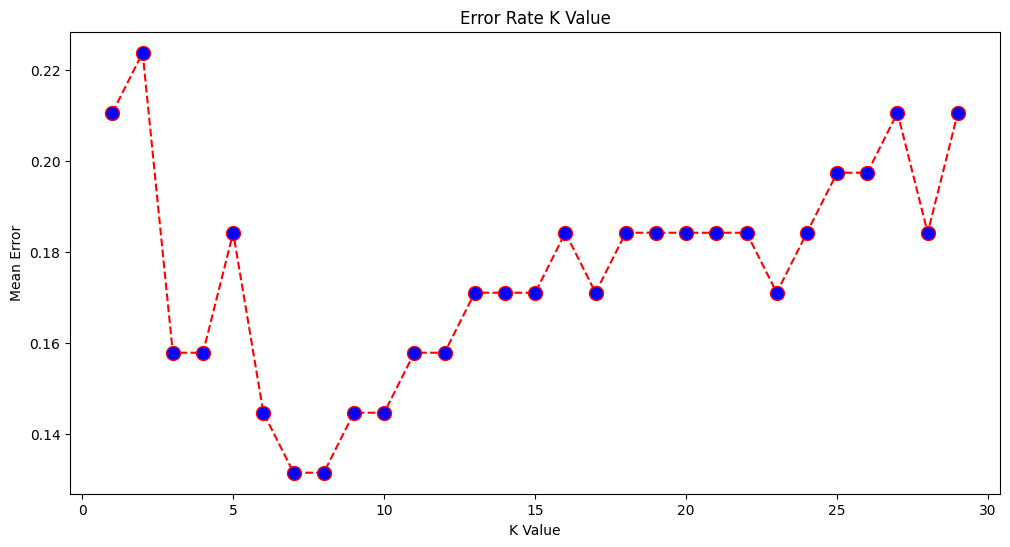

In [5]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [6]:
classifier= KNeighborsClassifier(n_neighbors=9)
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

In [8]:
accuracy_score(y_test, y_pred)

0.8552631578947368